# **1. Perkenalan Dataset**


Dataset yang digunakan adalah "Telco Customer Churn" dari Kaggle.
Tujuannya adalah untuk memprediksi pelanggan mana yang kemungkinan besar akan berhenti berlangganan (churn).
Dataset ini memiliki 21 kolom yang terdiri dari fitur demografis pelanggan, layanan yang digunakan, informasi akun, dan kolom target 'Churn'.

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv('../dataset_raw/Telco-Customer-Churn.csv')
print("5 baris pertama dari dataset:")
print(df.head())
print("\nInfo dataset:")
df.info()

5 baris pertama dari dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Stream

# **4. Exploratory Data Analysis (EDA)**


Statistik deskriptif untuk fitur numerik:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


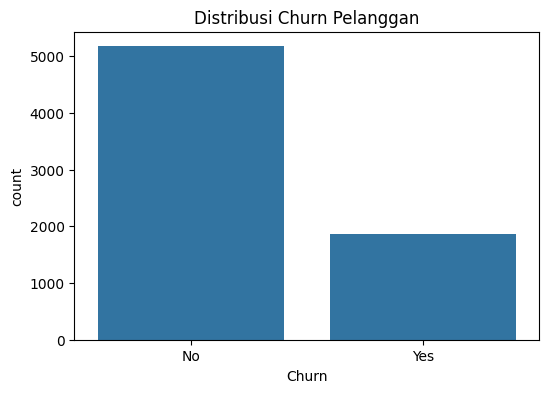

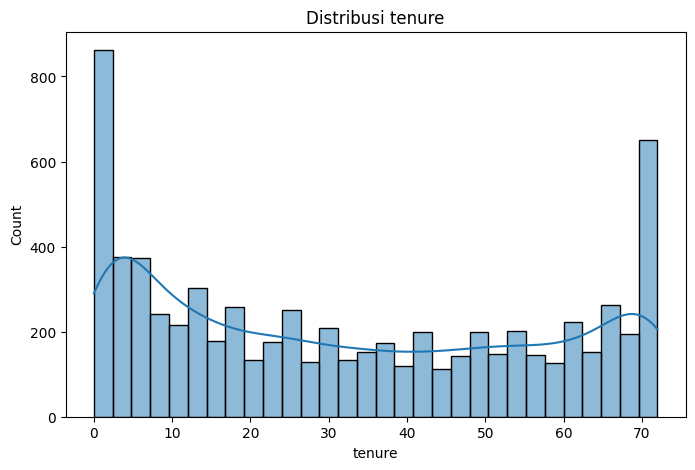

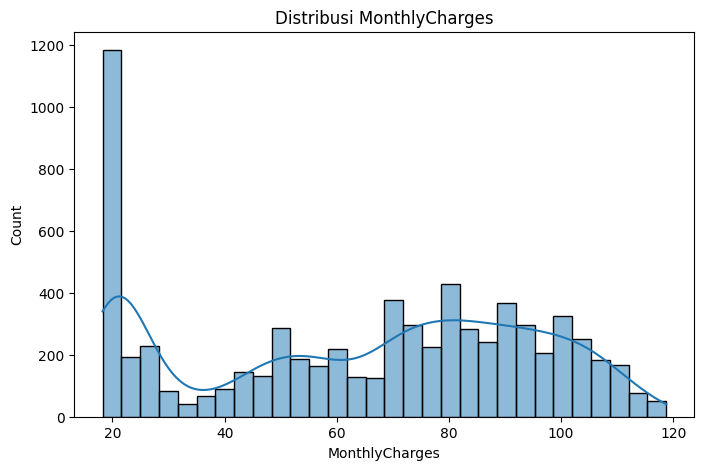

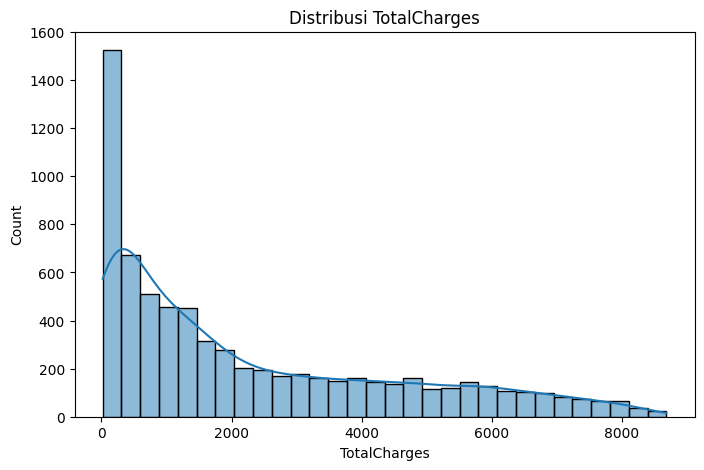

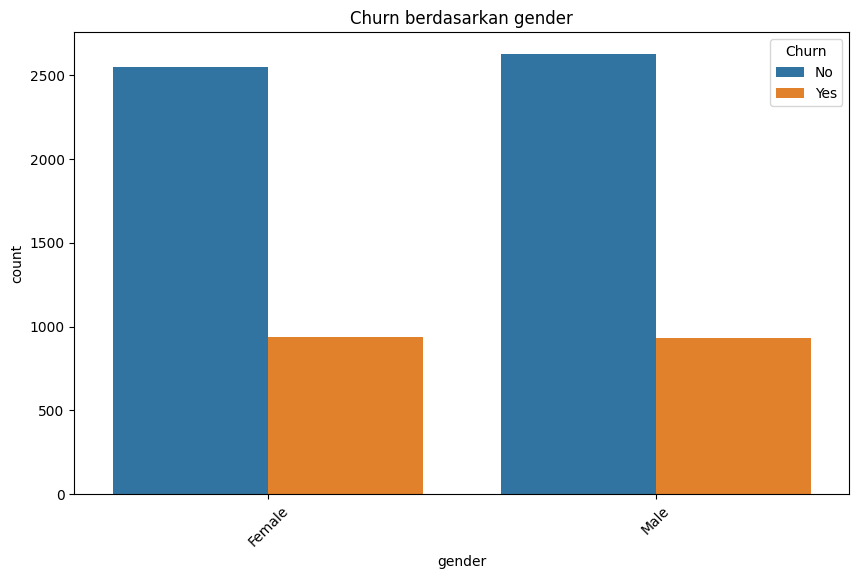

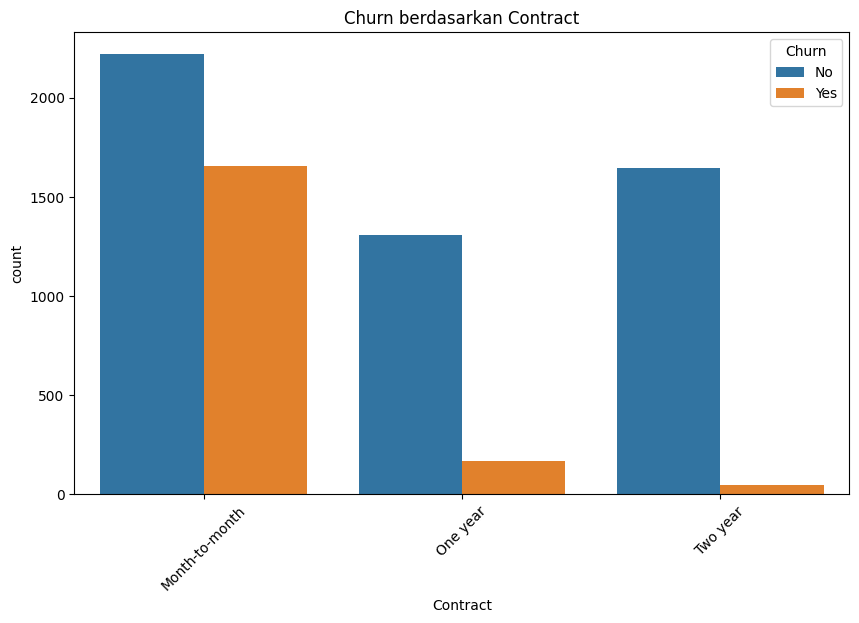

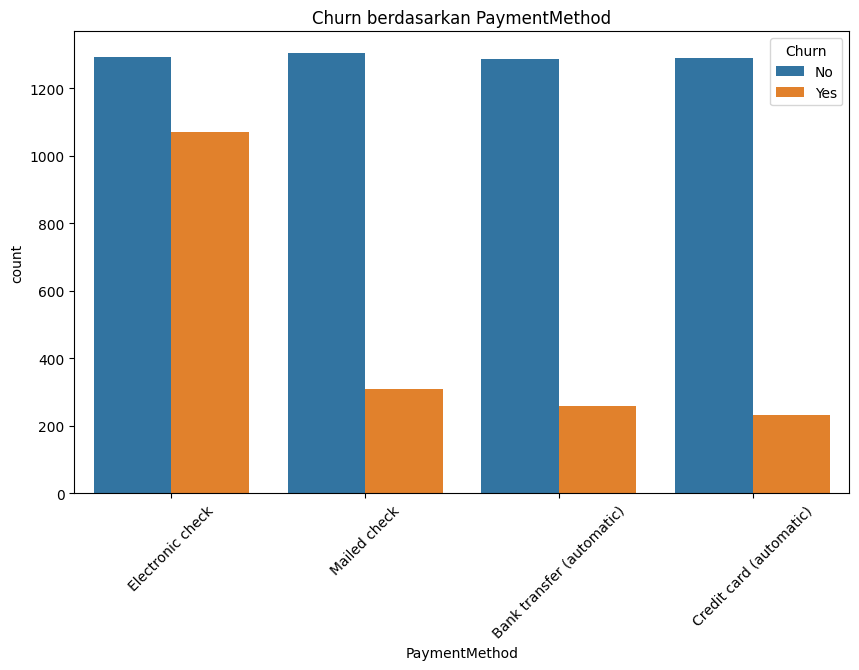

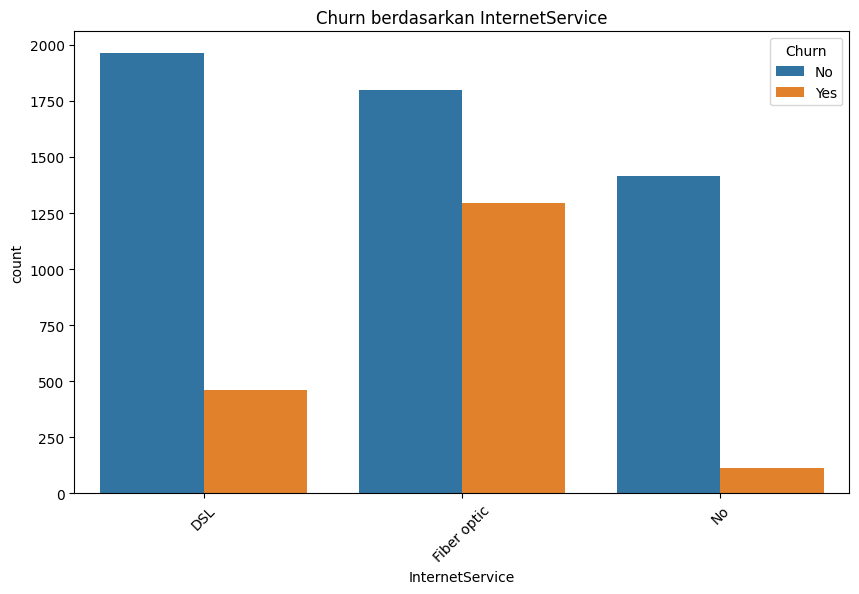

In [3]:
print("\nStatistik deskriptif untuk fitur numerik:")
print(df.describe())

# Konversi TotalCharges menjadi numerik, menangani spasi kosong
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Visualisasi distribusi Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Churn Pelanggan')
plt.show()

# Visualisasi fitur numerik
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribusi {feature}')
    plt.show()

# Visualisasi fitur kategorikal terhadap Churn
categorical_features = ['gender', 'Contract', 'PaymentMethod', 'InternetService']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn berdasarkan {feature}')
    plt.xticks(rotation=45)
    plt.show()

# **5. Data Preprocessing**

In [4]:
# Menangani Missing Values
# Cek nilai null setelah konversi TotalCharges
print(f"\nJumlah missing values di TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Isi nilai null dengan median
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)
print("Missing values setelah diisi:")
print(df.isnull().sum())

# Hapus kolom yang tidak relevan (jika ada, misal customerID)
df_processed = df.drop('customerID', axis=1)

# Encoding Data Kategorikal
# Pisahkan fitur biner dan multi-kelas
binary_cols = [col for col in df_processed.columns if df_processed[col].nunique() == 2 and col != 'Churn']
multi_cols = [col for col in df_processed.columns if df_processed[col].dtype == 'object' and df_processed[col].nunique() > 2]

# Label Encoding untuk fitur biner dan target
le = LabelEncoder()
for col in binary_cols + ['Churn']:
    df_processed[col] = le.fit_transform(df_processed[col])

# One-Hot Encoding untuk fitur multi-kelas
df_processed = pd.get_dummies(df_processed, columns=multi_cols, drop_first=True)

print("\nDataset setelah encoding:")
print(df_processed.head())

# Normalisasi/Standarisasi Fitur Numerik
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

print("\nDataset setelah standarisasi:")
print(df_processed.head())

# Simpan dataset yang sudah diproses
df_processed.to_csv('Telco-Customer-Churn_preprocessing.csv', index=False)
print("\nDataset yang sudah diproses telah disimpan sebagai Telco-Customer-Churn_preprocessing.csv")


Jumlah missing values di TotalCharges: 11
Missing values setelah diisi:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Dataset setelah encoding:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

/tmp/ipykernel_291189/646689794.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_total_charges, inplace=True)
